In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

Data source: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [31]:
data = pd.read_csv("country_vaccinations.csv")

What is the average vaccinations per country?

In [32]:
countrytotal= data.groupby(["country"])["total_vaccinations"].max()
number1 = (countrytotal.sum())/(countrytotal.count())
print(round(number1))

1653452


# 

What is the average people fully vaccinated per country?

In [70]:
countryfully= data.groupby(["country"])["people_fully_vaccinated"].max()
countryfully=countryfully.dropna()
number2 = (countryfully.sum()) / (countryfully.count())
print(round(number2))


289807


# 

Which combination of vaccines was used the most?

In [34]:
countryVaccinescombo = data.drop_duplicates(["country"])
print(countryVaccinescombo["vaccines"].value_counts())

Pfizer/BioNTech                          37
Moderna, Pfizer/BioNTech                 14
Oxford/AstraZeneca                        6
Oxford/AstraZeneca, Pfizer/BioNTech       5
Sputnik V                                 4
Oxford/AstraZeneca, Sinopharm             2
Sinovac                                   2
Pfizer/BioNTech, Sinopharm                2
Pfizer/BioNTech, Sinovac                  2
Oxford/AstraZeneca, Sinovac               1
CNBG, Sinovac                             1
Sinopharm                                 1
Pfizer/BioNTech, Sinopharm, Sputnik V     1
Covaxin, Oxford/AstraZeneca               1
Name: vaccines, dtype: int64


Pfizer/BioNTech 

# 

Bar Chart of Vaccines Combo

<BarContainer object of 14 artists>

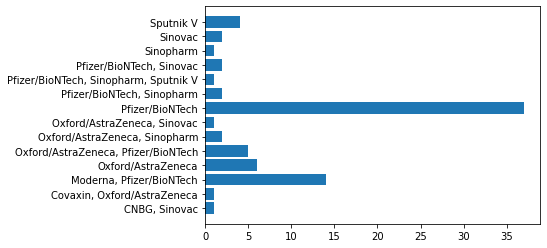

In [36]:
bardata= countryVaccinescombo.groupby(["vaccines"])["vaccines"].count()
plt.barh(bardata.index,bardata)

# 

Daily Vaccination rate in the US

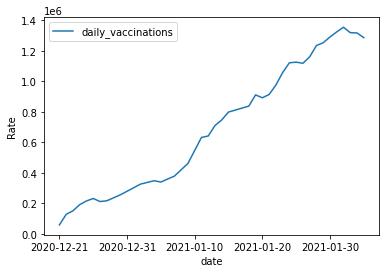

In [79]:
unitedStates = data[data["country"].str.contains("United States")]
unitedStates.sort_values("date")
unitedStates = unitedStates.dropna(subset=["daily_vaccinations"])
rate = unitedStates.plot.line(x="date", y="daily_vaccinations")
rate= rate.set_ylabel("Rate")

# 

Max Daily Vaccinations VS Max People Fully Vaccinated in each country (Without Outliers)

Text(0.5, 0, 'Daily Vaccinations')

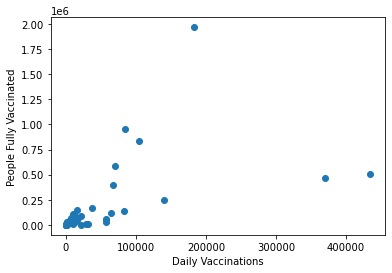

In [152]:
comparison = data.dropna(subset=["daily_vaccinations","people_fully_vaccinated"])
maxDaily= comparison.groupby(["country"])["daily_vaccinations"].max()
maxVaccinated= comparison.groupby(["country"])["people_fully_vaccinated"].max()
maxComparison = pd.concat([maxDaily, maxVaccinated],axis=1)
z = stats.zscore(maxComparison)
absZ = np.abs(z)
maxComparisonfiltered = (absZ < 3).all(axis=1)
newMaxcomparison= maxComparison[maxComparisonfiltered]
plt.scatter(newMaxcomparison["daily_vaccinations"],newMaxcomparison["people_fully_vaccinated"])
plt.ylabel("People Fully Vaccinated")
plt.xlabel("Daily Vaccinations")

Hypothesis 1: Daily vaccination rate in the US is increasing by 100 dose everyday.

Hypothesis 2: Country that uses the Pfizer Vaccine has the highest number of people vaccinated.